# **Machine Learning para Business Intelligence** 
#### Profesor: Juan Pablo Salas

## Clase 3. Introducción a regresiones

In [1009]:
# Importamos las librerías de la clase
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Para la clase de hoy, continuaremos con los datos de calidad de vinos

In [1010]:
calidad_vinos = pd.read_csv('../Datos/wine-quality.csv')

Nuestro objetivo será ahora predecir su calidad.

In [1011]:
calidad_vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Terre di Giurfo 2014 Belsito Frappato (Vittoria)
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Feudo Arancio 2010 Stemmari Cabernet Sauvignon...
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Bryn Mawr Vineyards 2016 Estate Riesling (Eola...
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Château le Prieuré 2010 Barrel sample (Saint-...
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Brave & Maiden 2014 Estate Cabernet Sauvignon ...


Quisieramos calcular otra información a partir de la que tenemos. En particular
- El **tipo** de vino basado en una lista: *Cabernet Sauvignon, Chardonnay, Pinot Noir*,...
- El **año** del vino basado en su título.

In [1012]:
tipo_vino = ['Cabernet Sauvignon','Chardonnay','Pinot Noir','Sparkling','Sauvignon Blanc','Merlot',\
              'Malbec','Prosecco','Rosé','Syrah','Zynfandel','Tempranillo','Moscato','Riesling','Pinot Gris']

Creamos una función que nos permita encontrar un tipo de vino a partir de esta lista.

In [1013]:
def encontrar_tipo_vino(text: str):
    tipo = 'Otro'
    for k in tipo_vino:
        if k.lower() in text.lower():
            tipo = k
            break
    return tipo

In [1014]:
encontrar_tipo_vino('Basel Cellars 2011 Merlot (Columbia Valley (WA))')

'Merlot'

In [1015]:
encontrar_tipo_vino('DFJ Vinhos 2011 Vega Red (Douro)')

'Otro'

In [1016]:
encontrar_tipo_vino('Beaulieu Vineyard 2013 Maestro Collection Cabernet Sauvignon-Syrah (Napa Valley)')

'Cabernet Sauvignon'

Ahora, aplicamos esta función a todos los títulos.

In [1017]:
calidad_vinos['tipo vino'] = calidad_vinos.title.apply(encontrar_tipo_vino)

Es fácil confundirse con la columna `type`, que en realidad hace referencia al color.

In [1018]:
calidad_vinos = calidad_vinos.rename(columns={'type':'color'})

Quisiéramos sacar también el año en el que salió un vino. Para esto utilizamos un paquete conocido como `RegEx` basado en expresiones regulares. Estas las cubriremos más adelante en el curso, por ahora ¡observen la magia!

In [1019]:
calidad_vinos.title.apply(lambda s: re.findall('\d{4}',s)[0] if len(re.findall('\d{4}',s))>0 else np.nan)

0       2014
1       2010
2       2016
3       2010
4       2014
        ... 
6492    2014
6493    2016
6494    2008
6495    2012
6496    2014
Name: title, Length: 6497, dtype: object

In [1020]:
calidad_vinos['año'] = pd.to_numeric(calidad_vinos.title.apply(lambda s: re.findall('\d{4}',s)[0] if len(re.findall('\d{4}',s))>0 else np.nan))

In [1021]:
calidad_vinos.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title,tipo vino,año
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Terre di Giurfo 2014 Belsito Frappato (Vittoria),Otro,2014.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Feudo Arancio 2010 Stemmari Cabernet Sauvignon...,Cabernet Sauvignon,2010.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Bryn Mawr Vineyards 2016 Estate Riesling (Eola...,Riesling,2016.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Château le Prieuré 2010 Barrel sample (Saint-...,Otro,2010.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Brave & Maiden 2014 Estate Cabernet Sauvignon ...,Cabernet Sauvignon,2014.0


In [1022]:
calidad_vinos.isna().sum()

color                     0
fixed acidity            10
volatile acidity          8
citric acid               3
residual sugar            2
chlorides                 2
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        9
sulphates                 4
alcohol                   0
quality                   0
title                     0
tipo vino                 0
año                     226
dtype: int64

In [1023]:
imputacion_color_tipo = calidad_vinos.groupby(['color','tipo vino'])[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates','año']].mean()
imputacion_color_tipo.head()

fixed acidity  volatile acidity  citric acid  \
color tipo vino                                                          
red   Cabernet Sauvignon       8.269748          0.519034     0.260168   
      Chardonnay               8.472642          0.525952     0.278491   
      Malbec                   8.480556          0.538472     0.278611   
      Merlot                   8.325641          0.559103     0.236410   
      Moscato                  8.175000          0.516250     0.283750   

                          residual sugar  chlorides        pH  sulphates  \
color tipo vino                                                            
red   Cabernet Sauvignon        2.511765   0.086445  3.322605   0.660840   
      Chardonnay                2.466981   0.083660  3.297925   0.627830   
      Malbec                    2.470833   0.086083  3.299444   0.661111   
      Merlot                    2.353846   0.086000  3.310513   0.631316   
      Moscato                   2.900000   0.091250  3.288750   0.650000   

                                  año  
color tipo vino                        
red   Cabernet Sauvignon  2009.848739  
      Chardonnay          2010.356436  
      Malbec              2010.914286  
      Merlot              2009.078947  
      Moscato             2012.142857

In [1024]:
imputacion_color_tipo = imputacion_color_tipo.reset_index()
imputacion_color_tipo['llave'] = imputacion_color_tipo['color']+'-'+imputacion_color_tipo['tipo vino']

In [1025]:
imputacion_color_tipo = imputacion_color_tipo.drop(columns=['color','tipo vino']).set_index('llave')
imputacion_color_tipo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,año
llave,,,,,,,,
red-Cabernet Sauvignon,8.269748,0.519034,0.260168,2.511765,0.086445,3.322605,0.660840,2009.848739
red-Chardonnay,8.472642,0.525952,0.278491,2.466981,0.083660,3.297925,0.627830,2010.356436
red-Malbec,8.480556,0.538472,0.278611,2.470833,0.086083,3.299444,0.661111,2010.914286
red-Merlot,8.325641,0.559103,0.236410,2.353846,0.086000,3.310513,0.631316,2009.078947
red-Moscato,8.175000,0.516250,0.283750,2.900000,0.091250,3.288750,0.650000,2012.142857


In [1026]:
calidad_vinos['llave'] = calidad_vinos['color']+'-'+calidad_vinos['tipo vino']
calidad_vinos.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title,tipo vino,año,llave
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Terre di Giurfo 2014 Belsito Frappato (Vittoria),Otro,2014.0,white-Otro
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Feudo Arancio 2010 Stemmari Cabernet Sauvignon...,Cabernet Sauvignon,2010.0,white-Cabernet Sauvignon
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Bryn Mawr Vineyards 2016 Estate Riesling (Eola...,Riesling,2016.0,white-Riesling
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Château le Prieuré 2010 Barrel sample (Saint-...,Otro,2010.0,white-Otro
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Brave & Maiden 2014 Estate Cabernet Sauvignon ...,Cabernet Sauvignon,2014.0,white-Cabernet Sauvignon


In [1027]:
calidad_vinos['llave'].map(imputacion_color_tipo['fixed acidity'])

0       6.860941
1       6.902474
2       6.843500
3       6.860941
4       6.902474
          ...   
6492    8.322013
6493    8.043750
6494    8.269748
6495    8.332442
6496    8.276056
Name: llave, Length: 6497, dtype: float64

In [1028]:
calidad_vinos['fixed acidity'].fillna(calidad_vinos['llave'].map(imputacion_color_tipo['fixed acidity']))

0       7.0
1       6.3
2       8.1
3       7.2
4       7.2
       ... 
6492    6.2
6493    5.9
6494    6.3
6495    5.9
6496    6.0
Name: fixed acidity, Length: 6497, dtype: float64

In [1029]:
vars_imputar = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','pH','sulphates','año']
for columna_seleccionada in vars_imputar:
    calidad_vinos[columna_seleccionada] = calidad_vinos[columna_seleccionada].fillna(calidad_vinos['llave'].map(imputacion_color_tipo[columna_seleccionada]))

In [1030]:
calidad_vinos.isna().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
title                   0
tipo vino               0
año                     0
llave                   0
dtype: int64

In [1031]:
calidad_vinos.sample(5)

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title,tipo vino,año,llave
6492,red,6.2,0.60,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Samuel Louis Smith 2014 Radian Vineyard Pinot ...,Pinot Noir,2014.0,red-Pinot Noir
2294,white,7.0,0.32,0.31,6.4,0.031,38.0,115.0,0.99235,3.38,0.58,12.2,7,Happy Canyon Vineyard 2011 Barrack Blanc White...,Otro,2011.0,white-Otro
2810,white,7.8,0.26,0.31,3.6,0.025,22.0,100.0,0.99066,2.99,0.47,12.1,7,El Capricho 2015 Reserve Tempranillo,Tempranillo,2015.0,white-Tempranillo
4259,white,3.8,0.31,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,Tranche 2010 Estate Grown Syrah (Walla Walla V...,Syrah,2010.0,white-Syrah
3175,white,7.8,0.21,0.34,11.9,0.039,55.0,140.0,0.99590,3.02,0.31,10.3,6,McManis 2014 Petite Sirah (California),Otro,2014.0,white-Otro


In [1032]:
calidad_vinos.drop(columns='llave',inplace=True)

In [1033]:
calidad_vinos['año'] = calidad_vinos['año'].astype(int)

In [1034]:
calidad_vinos.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title,tipo vino,año
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Terre di Giurfo 2014 Belsito Frappato (Vittoria),Otro,2014
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Feudo Arancio 2010 Stemmari Cabernet Sauvignon...,Cabernet Sauvignon,2010
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Bryn Mawr Vineyards 2016 Estate Riesling (Eola...,Riesling,2016
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Château le Prieuré 2010 Barrel sample (Saint-...,Otro,2010
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Brave & Maiden 2014 Estate Cabernet Sauvignon ...,Cabernet Sauvignon,2014


### Visualicemos nuestro datos

In [1035]:
calidad_vinos['quality'] = calidad_vinos['quality'].astype(float)
calidad_vinos['fixed acidity'] = calidad_vinos['fixed acidity'].astype(float)
calidad_vinos['año'] = calidad_vinos['año'].astype(float)

In [1036]:
#sns.pairplot(data=calidad_vinos[['fixed acidity','volatile acidity','citric acid','total sulfur dioxide','residual sugar','sulphates','alcohol','chlorides','density','pH','año','color','quality']],hue='color')

In [1037]:
variables_numericas = ['fixed acidity','volatile acidity','citric acid','residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','año']

In [1038]:
estandarizador = StandardScaler()
estandarizador.fit(calidad_vinos.loc[:,variables_numericas])
calidad_vinos.loc[:,variables_numericas] = estandarizador.transform(calidad_vinos.loc[:,variables_numericas])

In [1039]:
variables_categoricas = ['color','tipo vino']

In [1040]:
X = calidad_vinos[variables_numericas+variables_categoricas]
y = calidad_vinos['quality']

In [1041]:
X = pd.get_dummies(X,columns=variables_categoricas,drop_first=True)

### División en conjunto de datos de entrenamiento y de prueba

In [1042]:
from sklearn.model_selection import train_test_split

In [1043]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [1044]:
X_train.shape

(4352, 27)

In [1045]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,tipo vino_Otro,tipo vino_Pinot Gris,tipo vino_Pinot Noir,tipo vino_Prosecco,tipo vino_Riesling,tipo vino_Rosé,tipo vino_Sauvignon Blanc,tipo vino_Sparkling,tipo vino_Syrah,tipo vino_Tempranillo
4688,-0.398575,-1.091706,0.008831,1.483147,-0.600613,-0.705730,0.712265,0.654795,-2.106570,-1.151006,...,0,0,0,0,0,0,0,0,0,0
5273,3.305542,1.217438,2.694390,-0.219589,1.940184,-1.381861,-1.782538,1.235097,-1.297287,2.008167,...,0,0,0,0,0,0,0,0,1,0
1746,0.218778,-0.727104,-0.197750,-0.135503,-0.172389,0.139434,-0.508596,-0.232332,-0.488004,-0.747707,...,1,0,0,0,0,0,0,0,0,0
5524,1.221976,1.582040,-0.197750,-0.682060,1.197929,-1.438205,-1.782538,1.368499,0.881552,-0.277192,...,1,0,0,0,0,0,0,0,0,0
1828,0.064440,-1.030939,-0.610913,0.179819,-0.143841,0.252123,2.198530,0.534733,0.881552,0.058890,...,1,0,0,0,0,0,0,0,0,0


In [1046]:
X_test.shape

(2145, 27)

In [1047]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,tipo vino_Otro,tipo vino_Pinot Gris,tipo vino_Pinot Noir,tipo vino_Prosecco,tipo vino_Riesling,tipo vino_Rosé,tipo vino_Sauvignon Blanc,tipo vino_Sparkling,tipo vino_Syrah,tipo vino_Tempranillo
4920,0.527454,0.549002,-0.748634,-0.808189,1.426315,-1.156484,-1.393278,0.634785,-0.301246,2.545899,...,0,0,0,0,0,0,0,0,0,0
4769,-0.321406,-0.423269,-0.128890,1.588254,-0.258034,2.167828,0.783039,0.784863,-0.363499,-0.209976,...,1,0,0,0,0,0,0,0,0,0
3109,-0.244237,-0.240968,0.284273,-0.198567,-0.058196,0.026746,1.543866,0.144530,1.130563,0.260539,...,0,0,0,0,0,0,0,0,0,0
959,0.064440,-0.605570,0.146552,2.092769,-0.172389,0.421155,1.030750,1.201746,-1.172782,-0.747707,...,0,0,0,0,0,0,0,0,0,0
5660,1.221976,2.189709,-2.194704,-0.787167,0.370028,-1.269173,-1.711763,0.771523,0.570290,-0.008326,...,1,0,0,0,0,0,0,0,0,0


### Nuestra primera regresión

In [1048]:
import statsmodels.api as sm

In [1049]:
X_train_adj = sm.add_constant(X_train)
X_train_adj = X_train_adj.astype(float)
model = sm.OLS(endog=y_train,exog=X_train_adj)
results = model.fit()

In [1050]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     70.09
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.41e-315
Time:                        17:27:43   Log-Likelihood:                -4801.3
No. Observations:                4352   AIC:                             9659.
Df Residuals:                    4324   BIC:                             9837.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.0532      0.064     94.354      0.000       5.927       6.179
fixed acidity                 0.0992      0.024      4.094      0.000       0.052       0.147
volatile acidity             -0.2605      0.016    -16.006      0.000      -0.292      -0.229
citric acid                  -0.0151      0.014     -1.072      0.284      -0.043       0.013
residual sugar                0.2884      0.034      8.585      0.000       0.223       0.354
chlorides                    -0.0308      0.014     -2.225      0.026      -0.058      -0.004
free sulfur dioxide           0.0685      0.017      4.114      0.000       0.036       0.101
total sulfur dioxide         -0.0866      0.022     -3.893      0.000      -0.130      -0.043
density                      -0.3052      0.050     -6.075      0.000      -0.404      -0.207
pH                            0.0674      0.017      3.870      0.000       0.033       0.101
sulphates                     0.1081      0.014      7.741      0.000       0.081       0.136
alcohol                       0.2657      0.025     10.465      0.000       0.216       0.315
año                           0.0057      0.010      0.556      0.578      -0.014       0.026
color_white                  -0.3461      0.067     -5.130      0.000      -0.478      -0.214
tipo vino_Chardonnay          0.0085      0.057      0.150      0.881      -0.102       0.119
tipo vino_Malbec              0.0947      0.085      1.118      0.264      -0.071       0.261
tipo vino_Merlot              0.0089      0.077      0.116      0.908      -0.142       0.160
tipo vino_Moscato            -0.1850      0.177     -1.044      0.296      -0.532       0.162
tipo vino_Otro                0.0244      0.042      0.585      0.559      -0.057       0.106
tipo vino_Pinot Gris          0.1211      0.112      1.085      0.278      -0.098       0.340
tipo vino_Pinot Noir          0.0595      0.053      1.123      0.262      -0.044       0.163
tipo vino_Prosecco            0.0960      0.139      0.690      0.491      -0.177       0.369
tipo vino_Riesling            0.0278      0.065      0.428      0.669      -0.100       0.155
tipo vino_Rosé                0.0715      0.073      0.984      0.325      -0.071       0.214
tipo vino_Sauvignon Blanc    -0.0356      0.070     -0.510      0.610      -0.173       0.101
tipo vino_Sparkling          -0.0091      0.095     -0.096      0.924      -0.195       0.177
tipo vino_Syrah               0.0587      0.071      0.825      0.409      -0.081       0.198
tipo vino_Tempranillo         0.2238      0.141      1.582      0.114      -0.054       0.501
==============================================================================
Omnibus:                       80.888   Durbin-Watson:                   2.064
Prob(Omnibu

In [1051]:
from sklearn.linear_model import LinearRegression

In [1052]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train,y_train)

LinearRegression()

In [1053]:
modelo_regresion.predict(X_test)

array([5.57972736, 5.87429366, 5.59136008, ..., 5.25836726, 5.2980035 ,
       6.44231878])

In [1054]:
final = X_test.copy()
final['prediccion'] = modelo_regresion.predict(X_test)
final['calidad real'] = y_test

In [1055]:
final['prediccion'] = final['prediccion'].astype(int)

In [1056]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [1057]:
mean_absolute_error(y_true=y_train,y_pred=modelo_regresion.predict(X_train))

0.566905023193827

In [1058]:
mean_absolute_error(y_true=y_test,y_pred=modelo_regresion.predict(X_test))

0.5732435491228676

In [1059]:
mean_absolute_percentage_error(y_true=y_train,y_pred=modelo_regresion.predict(X_train))

0.10070192162633645

In [1060]:
mean_absolute_percentage_error(y_true=y_test,y_pred=modelo_regresion.predict(X_test))

0.10259006394865589

### Debemos probar otra cosa

In [1061]:
calidad_vinos.loc[:,variables_numericas] = estandarizador.inverse_transform(calidad_vinos.loc[:,variables_numericas])

In [1062]:
calidad_vinos.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,title,tipo vino,año
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,Terre di Giurfo 2014 Belsito Frappato (Vittoria),Otro,2014.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,Feudo Arancio 2010 Stemmari Cabernet Sauvignon...,Cabernet Sauvignon,2010.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,Bryn Mawr Vineyards 2016 Estate Riesling (Eola...,Riesling,2016.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,Château le Prieuré 2010 Barrel sample (Saint-...,Otro,2010.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,Brave & Maiden 2014 Estate Cabernet Sauvignon ...,Cabernet Sauvignon,2014.0


In [1063]:
variables_numericas = ['fixed acidity','volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [1064]:
variables_grado_poly = ['fixed acidity','volatile acidity','residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [1065]:
from sklearn.preprocessing import PolynomialFeatures
trans_polinomial = PolynomialFeatures(degree=2)
trans_polinomial.fit(calidad_vinos.loc[:,variables_grado_poly])

PolynomialFeatures()

In [1066]:
pd.DataFrame(trans_polinomial.transform(calidad_vinos.loc[:,variables_grado_poly]),
             columns=trans_polinomial.get_feature_names_out(input_features=variables_grado_poly))

,1,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,density,pH,sulphates,alcohol,fixed acidity^2,...,density^2,density pH,density sulphates,density alcohol,pH^2,pH sulphates,pH alcohol,sulphates^2,sulphates alcohol,alcohol^2
0,1.0,7.0,0.270,20.7,45.0,1.00100,3.00,0.450000,8.8,49.00,...,1.002001,3.003000,0.450450,8.808800,9.0000,1.350000,26.400,0.202500,3.96000,77.44
1,1.0,6.3,0.300,1.6,14.0,0.99400,3.30,0.490000,9.5,39.69,...,0.988036,3.280200,0.487060,9.443000,10.8900,1.617000,31.350,0.240100,4.65500,90.25
2,1.0,8.1,0.280,6.9,30.0,0.99510,3.26,0.440000,10.1,65.61,...,0.990224,3.244026,0.437844,10.050510,10.6276,1.434400,32.926,0.193600,4.44400,102.01
3,1.0,7.2,0.230,8.5,47.0,0.99560,3.19,0.400000,9.9,51.84,...,0.991219,3.175964,0.398240,9.856440,10.1761,1.276000,31.581,0.160000,3.96000,98.01
4,1.0,7.2,0.230,8.5,47.0,0.99560,3.19,0.400000,9.9,51.84,...,0.991219,3.175964,0.398240,9.856440,10.1761,1.276000,31.581,0.160000,3.96000,98.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.600,2.0,32.0,0.99490,3.45,0.580000,10.5,38.44,...,0.989826,3.432405,0.577042,10.446450,11.9025,2.001000,36.225,0.336400,6.09000,110.25
6493,1.0,5.9,0.550,2.2,39.0,0.99512,3.52,0.665745,11.2,34.81,...,0.990264,3.502822,0.662496,11.145344,12.3904,2.343421,39.424,0.443216,7.45634,125.44
6494,1.0,6.3,0.510,2.3,29.0,0.99574,3.42,0.750000,11.0,39.69,...,0.991498,3.405431,0.746805,10.953140,11.6964,2.565000,37.620,0.562500,8.25000,121.00
6495,1.0,5.9,0.645,2.0,32.0,0.99547,3.57,0.710000,10.2,34.81,...,0.990961,3.553828,0.706784,10.153794,12.7449,2.534700,36.414,0.504100,7.24200,104.04


In [1067]:
calidad_vinos_poly = pd.concat([calidad_vinos.drop(columns=variables_grado_poly),pd.DataFrame(trans_polinomial.transform(calidad_vinos.loc[:,variables_grado_poly]),
             columns=trans_polinomial.get_feature_names_out(input_features=variables_grado_poly))],axis=1)

In [1068]:
variables_numericas_poly = list(set(variables_numericas + list(trans_polinomial.get_feature_names_out(input_features=variables_grado_poly))))

In [1069]:
estandarizador = StandardScaler()
estandarizador.fit(calidad_vinos_poly.loc[:,variables_numericas_poly])
calidad_vinos_poly.loc[:,variables_numericas_poly] = estandarizador.transform(calidad_vinos_poly.loc[:,variables_numericas_poly])

In [1070]:
variables_categoricas = ['color']

In [1071]:
X = calidad_vinos_poly[variables_numericas_poly+variables_categoricas]
y = calidad_vinos_poly['quality']

In [1072]:
X = pd.get_dummies(X,columns=variables_categoricas,drop_first=True)

In [1073]:
X

,free sulfur dioxide pH,pH,volatile acidity pH,volatile acidity density,pH sulphates,density alcohol,residual sugar pH,density^2,volatile acidity residual sugar,pH alcohol,...,sulphates alcohol,volatile acidity alcohol,free sulfur dioxide^2,fixed acidity volatile acidity,fixed acidity free sulfur dioxide,residual sugar^2,density pH,alcohol^2,free sulfur dioxide,color_white
0,0.656200,-1.359539,-0.517684,-0.412562,-0.729965,-1.396278,3.001363,2.105749,2.372519,-1.689786,...,-0.949783,-0.676302,0.450136,-0.424468,0.832946,3.900862,-1.237988,-1.316346,0.815565,1
1,-0.911393,0.508037,-0.196404,-0.242400,-0.194985,-0.851311,-0.806888,-0.233578,-0.740549,-0.557911,...,-0.540572,-0.404683,-0.607801,-0.424468,-1.033157,-0.515458,0.492325,-0.821270,-0.931107,1
2,-0.000495,0.259027,-0.334197,-0.361641,-0.560855,-0.329278,0.346847,0.132943,0.144198,-0.197541,...,-0.664807,-0.417289,-0.200590,-0.160610,0.240532,-0.048350,0.266523,-0.366774,-0.029599,1
3,0.919760,-0.176741,-0.653870,-0.664070,-0.878237,-0.496042,0.656561,0.299678,0.158213,-0.505090,...,-0.949783,-0.733033,0.556566,-0.587809,1.025480,0.207133,-0.158328,-0.521365,0.928254,1
4,0.919760,-0.176741,-0.653870,-0.664070,-0.878237,-0.496042,0.656561,0.299678,0.158213,-0.505090,...,-0.949783,-0.733033,0.556566,-0.587809,1.025480,0.207133,-0.158328,-0.521365,0.928254,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.221934,1.441825,1.731274,1.577655,0.574426,0.010953,-0.698311,0.066273,-0.301831,0.556814,...,0.304345,1.572296,-0.128866,0.852941,-0.126435,-0.500527,1.442406,-0.048318,0.083090,0
6493,0.696449,1.877593,1.492099,1.275324,1.260526,0.611513,-0.641743,0.139611,-0.295738,1.288302,...,1.108836,1.492071,0.158611,0.521373,0.134392,-0.491818,1.881960,0.538739,0.477500,0
6494,0.023867,1.255068,1.149757,1.034742,1.704498,0.446352,-0.633566,0.346379,-0.318283,0.875797,...,1.576137,1.176901,-0.234717,0.499036,-0.255614,-0.487152,1.274030,0.367143,-0.085943,0
6495,0.289722,2.188856,2.146527,1.852657,1.643786,-0.240526,-0.682225,0.256319,-0.246991,0.600031,...,0.982634,1.732174,-0.128866,0.912624,-0.205423,-0.500527,2.200342,-0.288320,0.083090,0


In [1074]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [1075]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train,y_train)

LinearRegression()

In [1076]:
modelo_regresion.predict(X_test)

array([5.40721802, 6.0094463 , 5.71063948, ..., 5.97978075, 5.87343973,
       6.16122494])

In [1077]:
mean_absolute_error(y_true=y_test,y_pred=np.round(modelo_regresion.predict(X_test)))

0.5114219114219114

In [1078]:
mean_absolute_error(y_true=y_train,y_pred=np.round(modelo_regresion.predict(X_train)))

0.4990808823529412

In [1079]:
mean_absolute_percentage_error(y_true=y_test,y_pred=np.round(modelo_regresion.predict(X_test)))

0.09255263255263253

In [1080]:
mean_absolute_percentage_error(y_true=y_train,y_pred=np.round(modelo_regresion.predict(X_train)))

0.0887633308531746

In [1081]:
pd.DataFrame(modelo_regresion.coef_,index=modelo_regresion.feature_names_in_).rename(columns={0:'coef'}).sort_values(by='coef',ascending=False).head()

,coef
density^2,135.024232
pH,102.661330
free sulfur dioxide,50.570294
fixed acidity,32.707951
volatile acidity density,23.857724


### Regresión Ridge - Regularización L2

In [1082]:
from sklearn.linear_model import Ridge
regresion_ridge = Ridge(alpha=1)
regresion_ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [1083]:
mean_absolute_percentage_error(y_true=y_test,y_pred=np.round(regresion_ridge.predict(X_test)))

0.09407055907055907

In [1084]:
pd.DataFrame(regresion_ridge.coef_,index=regresion_ridge.feature_names_in_).rename(columns={0:'coef'}).sort_values(by='coef',ascending=False).head()

,coef
residual sugar density,0.784468
free sulfur dioxide alcohol,0.727101
residual sugar,0.641487
pH sulphates,0.610951
volatile acidity alcohol,0.558973


In [1085]:
regresion_ridge = Ridge(alpha=2)
regresion_ridge.fit(X_train,y_train)

Ridge(alpha=2)

In [1086]:
mean_absolute_percentage_error(y_true=y_test,y_pred=np.round(regresion_ridge.predict(X_test)))

0.09369315869315868

In [1087]:
pd.DataFrame(regresion_ridge.coef_,index=regresion_ridge.feature_names_in_).rename(columns={0:'coef'}).sort_values(by='coef',ascending=False).head()

,coef
free sulfur dioxide alcohol,0.691093
residual sugar density,0.656827
residual sugar,0.593196
pH sulphates,0.535589
volatile acidity alcohol,0.526406


### Regresión Lasso - Regularización L1

In [1088]:
from sklearn.linear_model import Lasso
regresion_lasso = Lasso(alpha=1)
regresion_lasso.fit(X_train,y_train)
mean_absolute_percentage_error(y_true=y_test,y_pred=np.round(regresion_lasso.predict(X_test)))

0.12287157287157287

In [1089]:
regresion_lasso = Lasso(alpha=0.01)
regresion_lasso.fit(X_train,y_train)
mean_absolute_percentage_error(y_true=y_test,y_pred=np.round(regresion_lasso.predict(X_test)))

0.09727624227624226

In [1090]:
pd.DataFrame(regresion_lasso.coef_,index=regresion_lasso.feature_names_in_).rename(columns={0:'coef'}).sort_values(by='coef',ascending=False).head(50)

,coef
alcohol^2,0.251488
free sulfur dioxide alcohol,0.215114
pH alcohol,0.089428
sulphates alcohol,0.079593
fixed acidity residual sugar,0.043082
residual sugar alcohol,0.029989
fixed acidity sulphates,0.021979
fixed acidity free sulfur dioxide,0.000000
free sulfur dioxide,0.000000
free sulfur dioxide density,0.000000


### Validación Cruzada

In [1091]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

scores = cross_val_score(regresion_lasso,X_test,y_test,cv=5,scoring='neg_mean_absolute_percentage_error')

In [1092]:
scores

array([-0.10533159, -0.10994684, -0.10510858, -0.10240017, -0.10078383])

### Búsqueda de hiperparámetros para Lasso

In [1093]:
from sklearn.model_selection import GridSearchCV

busqueda_cuadricula = GridSearchCV(Lasso(),param_grid={'alpha':[0.0001,0.001,0.01,0.1,1,10]},scoring='neg_mean_absolute_percentage_error')
busqueda_cuadricula.fit(X_train,y_train)

/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+02, tolerance: 2.663e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.644e+02, tolerance: 2.641e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='neg_mean_absolute_percentage_error')

In [1094]:
pd.DataFrame(busqueda_cuadricula.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.102650,0.005814,0.001887,0.000513,0.0001,{'alpha': 0.0001},-0.097617,-0.098260,-0.096752,-0.101637,-0.099623,-0.098778,0.001709,1
1,0.080540,0.004166,0.001584,0.000436,0.001,{'alpha': 0.001},-0.097873,-0.098832,-0.097515,-0.101933,-0.099387,-0.099108,0.001562,2
2,0.021085,0.003292,0.001321,0.000044,0.01,{'alpha': 0.01},-0.099966,-0.101759,-0.099965,-0.103040,-0.099875,-0.100921,0.001274,3
3,0.018984,0.012162,0.002093,0.000611,0.1,{'alpha': 0.1},-0.104964,-0.105724,-0.105722,-0.108730,-0.106859,-0.106400,0.001313,4
4,0.003388,0.001762,0.001220,0.000191,1,{'alpha': 1},-0.116406,-0.119834,-0.121121,-0.123874,-0.123600,-0.120967,0.002738,5
5,0.002120,0.000160,0.001120,0.000092,10,{'alpha': 10},-0.116406,-0.119834,-0.121121,-0.123874,-0.123600,-0.120967,0.002738,5


<Axes: xlabel='Párametro $\\alpha$', ylabel='Score promedio'>

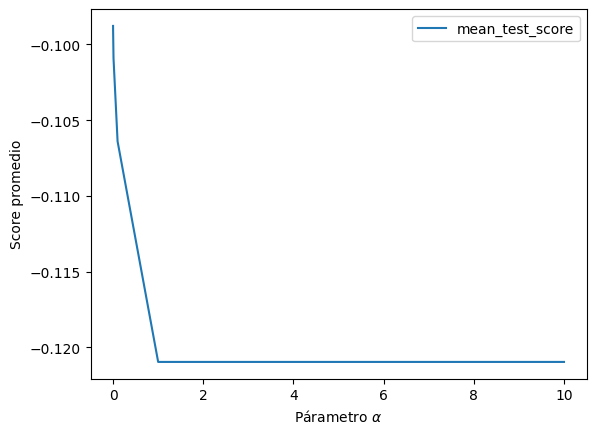

In [1095]:
pd.DataFrame(busqueda_cuadricula.cv_results_).plot(x='param_alpha',y='mean_test_score',xlabel=r'Párametro $\alpha$',ylabel='Score promedio')

In [1096]:
np.logspace(-4,-2,20)

array([0.0001    , 0.00012743, 0.00016238, 0.00020691, 0.00026367,
       0.00033598, 0.00042813, 0.00054556, 0.00069519, 0.00088587,
       0.00112884, 0.00143845, 0.00183298, 0.00233572, 0.00297635,
       0.00379269, 0.00483293, 0.00615848, 0.0078476 , 0.01      ])

In [1097]:
from sklearn.model_selection import GridSearchCV

busqueda_cuadricula = GridSearchCV(Lasso(),param_grid={'alpha':np.logspace(-5,-2,20)},scoring='neg_mean_absolute_percentage_error')
busqueda_cuadricula.fit(X_train,y_train)

/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.274e+02, tolerance: 2.663e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.325e+02, tolerance: 2.641e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.355e+02, tolerance: 2.663e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+02, tolerance: 2.641e-01
  model = cd_fast.enet_coordinate_descent(
/Users/juanpablosalas/opt/anaconda3/envs/intropy/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 1.43844989e-05, 2.06913808e-05, 2.97635144e-05,
       4.28133240e-05, 6.15848211e-05, 8.85866790e-05, 1.27427499e-04,
       1.83298071e-04, 2.63665090e-04, 3.79269019e-04, 5.45559478e-04,
       7.84759970e-04, 1.12883789e-03, 1.62377674e-03, 2.33572147e-03,
       3.35981829e-03, 4.83293024e-03, 6.95192796e-03, 1.00000000e-02])},
             scoring='neg_mean_absolute_percentage_error')

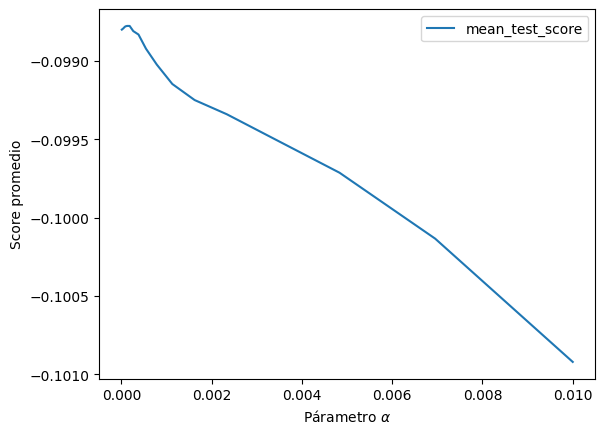

In [1098]:
_ = pd.DataFrame(busqueda_cuadricula.cv_results_).plot(x='param_alpha',y='mean_test_score',xlabel=r'Párametro $\alpha$',ylabel='Score promedio')

In [1099]:
busqueda_cuadricula.best_estimator_

Lasso(alpha=0.00012742749857031334)

In [1100]:
pd.Series(busqueda_cuadricula.best_estimator_.coef_,index=busqueda_cuadricula.best_estimator_.feature_names_in_).sort_values()

residual sugar pH                      -0.621904
free sulfur dioxide density            -0.596737
volatile acidity pH                    -0.498248
density alcohol                        -0.487233
color_white                            -0.445728
volatile acidity density               -0.414974
density                                -0.356177
density sulphates                      -0.354349
fixed acidity                          -0.344323
free sulfur dioxide pH                 -0.269259
residual sugar alcohol                 -0.229788
residual sugar sulphates               -0.167124
free sulfur dioxide^2                  -0.149987
pH^2                                   -0.138921
residual sugar^2                       -0.134053
sulphates^2                            -0.122847
fixed acidity free sulfur dioxide      -0.118834
density^2                              -0.092561
fixed acidity alcohol                  -0.089690
residual sugar                         -0.088379
volatile acidity res

### Búsqueda de hiperparámetros para Ridge

In [1101]:
busqueda_cuadricula_ridge = GridSearchCV(Ridge(),param_grid={'alpha':np.logspace(-5,1,20)},scoring='neg_mean_absolute_percentage_error')
busqueda_cuadricula_ridge.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 2.06913808e-05, 4.28133240e-05, 8.85866790e-05,
       1.83298071e-04, 3.79269019e-04, 7.84759970e-04, 1.62377674e-03,
       3.35981829e-03, 6.95192796e-03, 1.43844989e-02, 2.97635144e-02,
       6.15848211e-02, 1.27427499e-01, 2.63665090e-01, 5.45559478e-01,
       1.12883789e+00, 2.33572147e+00, 4.83293024e+00, 1.00000000e+01])},
             scoring='neg_mean_absolute_percentage_error')

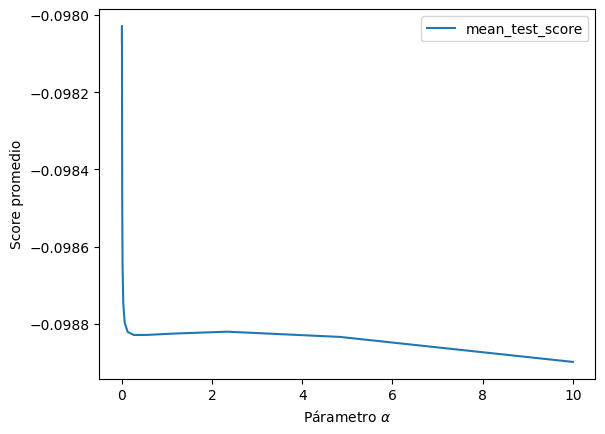

In [1102]:
_ = pd.DataFrame(busqueda_cuadricula_ridge.cv_results_).plot(x='param_alpha',y='mean_test_score',xlabel=r'Párametro $\alpha$',ylabel='Score promedio')

In [1103]:
busqueda_cuadricula_ridge.predict(X_test)

array([5.41796427, 6.01487416, 5.71881088, ..., 5.97876402, 5.87114892,
       6.15659581])

In [1104]:
mean_absolute_percentage_error(y_test,busqueda_cuadricula_ridge.predict(X_test))

0.10209528033925835

In [1105]:
busqueda_cuadricula_ridge.best_estimator_

Ridge(alpha=0.00018329807108324357)

In [1106]:
pd.Series(busqueda_cuadricula_ridge.best_estimator_.coef_,index=busqueda_cuadricula_ridge.best_estimator_.feature_names_in_).sort_values()

density pH                             -66.865730
density                                -45.383295
free sulfur dioxide density            -43.495287
residual sugar                         -32.121231
volatile acidity                       -30.107782
density alcohol                        -25.896770
fixed acidity                          -11.264210
sulphates                               -3.004035
pH alcohol                              -0.912451
residual sugar^2                        -0.552985
color_white                             -0.526689
fixed acidity^2                         -0.510752
alcohol^2                               -0.422995
volatile acidity pH                     -0.402213
fixed acidity residual sugar            -0.396995
fixed acidity volatile acidity          -0.241014
residual sugar sulphates                -0.204117
volatile acidity residual sugar         -0.201192
free sulfur dioxide^2                   -0.149449
sulphates^2                             -0.097030
